In [2]:
olrUni = mda.Universe("topol.tpr", "OLysRNA_s500_nj.xtc")

In [3]:
# check import
print("Checking import:\tplease ensure all values are as expected\n")
print(olrUni, "\n")
# get all residue names
reslist = [ ii for ii in set(olrUni.residues.resnames)]
print("residues:\t", reslist)
# get all atom names
atlist = [ii for ii in set(olrUni.atoms.types)]
print("atoms:\t\t", atlist)
# get all atom names
atnlist = [ii for ii in set(olrUni.atoms.names)]
atnlist.sort()
# segments
print("segments: \t", olrUni.segments)

Checking import:	please ensure all values are as expected

<Universe with 548771 atoms> 

residues:	 ['MG', 'A', 'SOL', 'CL', 'G', 'G3', 'G5', 'U', 'LYS', 'C']
atoms:		 ['OW', 'O2', 'HW', 'C5', 'H5', 'OH', 'HP', 'P', 'NA', 'N3', 'C', 'OS', 'N', 'H2', 'CQ', 'HC', 'CF', 'Cl', 'CB', 'CI', 'CT', 'MG', 'N2', 'NC', 'HO', 'CS', 'N*', 'O', 'H1', 'CP', 'H', 'C4', 'H4', 'NB', 'CA', 'HA']
segments: 	 <SegmentGroup [<Segment seg_0_rna_monomer>, <Segment seg_1_Oligolysine>, <Segment seg_2_SOL>, <Segment seg_3_MG>, <Segment seg_4_CL>]>


In [4]:
# define molecules
rna1 	= olrUni.atoms[	0	:	1898	]
rna2 	= olrUni.atoms[	1898	:	3796	]
olys01	 = olrUni.atoms[	3796	:	4151	]
olys02	 = olrUni.atoms[	4151	:	4506	]
olys03	 = olrUni.atoms[	4506	:	4861	]
olys04	 = olrUni.atoms[	4861	:	5216	]
olys05	 = olrUni.atoms[	5216	:	5571	]
olys06	 = olrUni.atoms[	5571	:	5926	]
olys07	 = olrUni.atoms[	5926	:	6281	]
olys08	 = olrUni.atoms[	6281	:	6636	]
olys09	 = olrUni.atoms[	6636	:	6991	]
olys10	 = olrUni.atoms[	6991	:	7346	]
olys11	 = olrUni.atoms[	7346	:	7701	]
olys12	 = olrUni.atoms[	7701	:	8056	]
olys13	 = olrUni.atoms[	8056	:	8411	]
olys14	 = olrUni.atoms[	8411	:	8766	]
olys15	 = olrUni.atoms[	8766	:	9121	]
olys16	 = olrUni.atoms[	9121	:	9476	]
olys17	 = olrUni.atoms[	9476	:	9831	]
olys18	 = olrUni.atoms[	9831	:	10186	]
olys19	 = olrUni.atoms[	10186	:	10541	]
olys20	 = olrUni.atoms[	10541	:	10896	]
olys21	 = olrUni.atoms[	10896	:	11251	]
olys22	 = olrUni.atoms[	11251	:	11606	]
olys23	 = olrUni.atoms[	11606	:	11961	]
olys24	 = olrUni.atoms[	11961	:	12316	]
olys25	 = olrUni.atoms[	12316	:	12671	]
olys26	 = olrUni.atoms[	12671	:	13026	]
olys27	 = olrUni.atoms[	13026	:	13381	]
olys28	 = olrUni.atoms[	13381	:	13736	]
olys29	 = olrUni.atoms[	13736	:	14091	]
olys30	 = olrUni.atoms[	14091	:	14446	]
# list to itr over
listmol = (rna1, rna2,  olys01, olys02, olys03, olys04, olys05, olys06, olys07, olys08, olys09, olys10, olys11, olys12, olys13, olys14, olys15, olys16, olys17, olys18, olys19, olys20, olys21, olys22, olys23, olys24, olys25, olys26, olys27, olys28, olys29, olys30)
itrmol = ("rna1", "rna2",  "olys01", "olys02", "olys03", "olys04", "olys05", "olys06", "olys07", "olys08", "olys09", "olys10", "olys11", "olys12", "olys13", "olys14", "olys15", "olys16", "olys17", "olys18", "olys19", "olys20", "olys21", "olys22", "olys23", "olys24", "olys25", "olys26", "olys27", "olys28", "olys29", "olys30")


In [5]:
# check
print(len(olrUni.segments[0].atoms), " ", len(rna1.atoms) + len(rna2.atoms))
# end of RNA
print("", olrUni.segments[0].atoms[-1], "\n", rna2.atoms[-1])
# end of olys
print("", olrUni.segments[1].atoms[-1], "\n", olys30.atoms[-1])
# check itr
#for mol in listmol : print(mol.atoms[0])

3796   3796
 <Atom 3796: HO3' of type HO of resname G3, resid 117 and segid seg_0_rna_monomer> 
 <Atom 3796: HO3' of type HO of resname G3, resid 117 and segid seg_0_rna_monomer>
 <Atom 14446: OC2 of type O2 of resname LYS, resid 597 and segid seg_1_Oligolysine> 
 <Atom 14446: OC2 of type O2 of resname LYS, resid 597 and segid seg_1_Oligolysine>


In [6]:
# tests
print(len(olrUni.trajectory))
print(olys01.center_of_mass())

201
[206.42485329 234.03400489 125.73704378]


In [7]:
# get all centre of mass positions
                                # inefficient, should change to input into array
llcoord = []
for mol in listmol:
    iicoord = []
    for tstep in olrUni.trajectory:
        com = mol.center_of_mass()
        iicoord.append([ olrUni.trajectory.time, com[0], com[1], com[2] ])
    # write to np array
    coords = pd.DataFrame(iicoord, columns=["time (ps)", "x", "y", "z"])
    coords.index.name="step"
    # all arrays into one list
    llcoord.append(coords)

In [8]:
# tests
'''ii=0
for array in llcoord: 
    print(itrmol[ii], "\n", array, "\n")
    ii+=1
'''

'ii=0\nfor array in llcoord: \n    print(itrmol[ii], "\n", array, "\n")\n    ii+=1\n'

In [9]:
# get vectors between frames
vectar = np.empty((len(itrmol), 200, 4)) # oof, not standardised
jj=0
for array in llcoord:
    npa = array.to_numpy()
    for ii in range(len(npa)-1):
        vectar[jj][ii][0]= npa[ii][0]
        for kk in range(1,4):
            vectar[jj][ii][kk] = npa[ii+1][kk] - npa[ii][kk]
    jj+=1
    
#print((vectar[31]))

In [25]:
# how many times are mol aggregated
cutoff = 5.0 # edit, it is very abritrary

time_countlist = []
for time in range(len(npa)-1):
    count = 0
    for mola in vectar:
        for molb in vectar:
            mag = math.sqrt( (math.pow(mola[time][1] - molb[time][1], 2) 
                              + math.pow(mola[time][2] - molb[time][2], 2) 
                              + math.pow(mola[time][3] - molb[time][3], 2) ))
            #print(mag)
            # could add something in here to compare time n to time n+1 (vector projection angle calculation?)
            if (mag < cutoff) and (mag > 0.001): count+=1 # if mag == 0 then mola == molb
    time_countlist.append([time, count])            
#print(time_countlist)

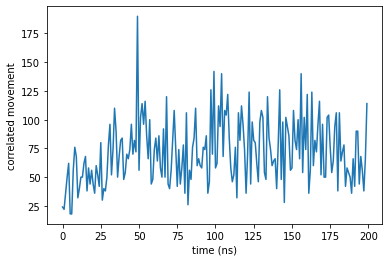

Correlated movement in coacervate system consisting of RNA and oligolysine


In [26]:
# graph of correlated movement

plotlist = []
timelist = []
for ii in range(len(time_countlist)):
    plotlist.append(time_countlist[ii][1])
    timelist.append(time_countlist[ii][0])
plt.plot(timelist,plotlist)
plt.xlabel("time (ns)")
plt.ylabel("correlated movement")
plt.show()
print("Correlated movement in coacervate system consisting of RNA and oligolysine")

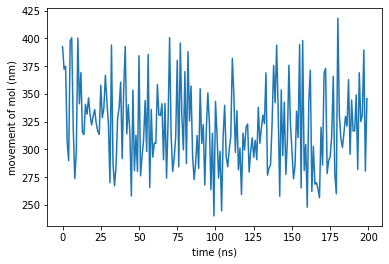

Total movement in coacervate system consisting of RNA and oligolysine


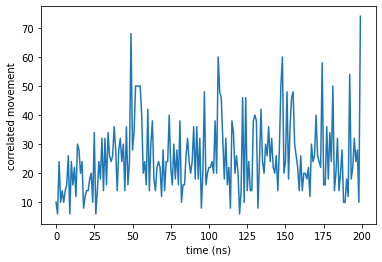

Correlated movement, standardised by total system movement, in coacervate system consisting of RNA and oligolysine


In [27]:
# standardise for total movement in system
stdcutoff = 0.01

# what is the total magnetude of the system?
timebasedmovement = []
for time in range(len(npa)-1):
    movement = 0.0
    for mol in vectar:
        movement += math.sqrt( math.pow(mol[time][1], 2) + math.pow(mol[time][2], 2) + math.pow(mol[time][3], 2) )
    timebasedmovement.append([time, movement])
#print(timebasedmovement)
plotlist = []
timelist = []
for ii in range(len(timebasedmovement)):
    plotlist.append(timebasedmovement[ii][1])
    timelist.append(timebasedmovement[ii][0])
plt.plot(timelist,plotlist)
plt.xlabel("time (ns)")
plt.ylabel("movement of mol (nm)")
plt.show()
print("Total movement in coacervate system consisting of RNA and oligolysine")
        
time_2countlist = []
ii=0
for time in range(len(npa)-1):
    count = 0
    for mola in vectar:
        for molb in vectar:
            mag = math.sqrt( (math.pow(mola[time][1] - molb[time][1], 2) + \
                              math.pow(mola[time][2] - molb[time][2], 2) + \
                              math.pow(mola[time][3] - molb[time][3], 2)   ) )
            #print(mag/timebasedmovement[ii][1])
            if (mag/timebasedmovement[ii][1] < stdcutoff) and (mag > 0.001): count+=1 # if mag == 0 then mol == mol
    time_2countlist.append([time, count])  
    ii+=1
#print(time_2countlist)
plotlist = []
timelist = []
for ii in range(len(time_2countlist)):
    plotlist.append(time_2countlist[ii][1])
    timelist.append(time_2countlist[ii][0])
plt.plot(timelist,plotlist)
plt.xlabel("time (ns)")
plt.ylabel("correlated movement")
plt.show()
print("Correlated movement, standardised by total system movement, in coacervate system consisting of RNA and oligolysine")